# Welcome to Lab 8: Divide & Conquer

In the previous lab we focussed on the core ideas of Divide & Conquer and Decrease & Conquer, this lab we will go into more detail about Divide & Conquer and how you can apply the idea to nonrecursive problems.

Throughout the exercise, you will be extending the classes by completing code stubs in their respective cells. You do not need to copy the code, it is enough to work in the cell under each exercise. Note that there are separate cells provided where you can (and should) test your code. During the exercises, you will (through customMagics) obtain a Python file (.py) which you should run against a set of unittests. Please avoid writing any unnecessary code in cells containing the `%%execwritefile` command. Doing this could alter the file `.py` and make it syntactically incorrect or interfere with the unittests. To prevent this stick to the following rules:'
 - ***Do not remove cells that start with ``%%execwritefile`` and do not remove that line.***
 - If a cell contains a `%%execwritefile` command at the top and a class definition you need to complete the given methods and adding helper methods is allowed, but do **not** add new functions or Python script to the cells (like global variables).
 - If a cell contains a `%%execwritefile` command at the top and **not** a class definition you must complete the given functions and you are free to add helper functions, new classes, and Python script that contains for example global variables. Note, that the use of global variables is almost always wrong except for a few use cases such as RNG for the numpy random generator methods.
 - If a cell does **not** contain a `%%execwritefile` command you can plot things, print variables, and write test cases. Here, you are free to do whatever you want.
 - If a cell does **not** contain a `%%execwritefile` command it should not contain functional code that is needed to run other functions or classes. The reason is that it is not copied to the `.py`. So, it can not be used during the unittesting.

You do not need to look at the `customMagic.py` nor do more than glimpse at the test file, your exercise is contained in this workbook unless specified differently in this notebook's instructions. 

***Hint: Jupyter Notebooks saves variables between runs. If you get unexpected results try restarting the kernel, this deletes any saved variables.*** 

Please fill in your student name down below

In [1]:
# FILL IN YOU STUDENT NUMBER
student = 3893995

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

In [2]:
from custommagics import CustomMagics

if WIDE_SCREEN:
    import notebook
    from IPython.display import display, HTML

    if int(notebook.__version__.split(".")[0]) >= 7:    
        display(HTML(
            '<style>'
                '.jp-Notebook { padding-left: 1% !important; padding-right: 1% !important; width:100% !important; } '
            '</style>'
        ))
    else:
        display(HTML("<style>.container { width:98% !important; }</style>"))

get_ipython().register_magics(CustomMagics)

In [3]:
%%execwritefile exercise8_{student}_notebook.py 0 

# DO NOT CHANGE THIS CELL.
# THESE ARE THE ONLY IMPORTS YOU ARE ALLOWED TO USE:

import numpy as np
import copy
import networkx as nx
import matplotlib.pyplot as plt

RNG = np.random.default_rng()

Writing exercise8_3893995_notebook.py


In [4]:
plt.matplotlib.rcParams['figure.figsize'] = [30, 10]

# 1.0 Equal Subset Sum

The equal subset sum problem tries to find a way to split a list of numbers into two lists that have an equal sum. One way to solve this problem is in each step to divide the problem into two subproblems, where one subproblem includes the nth element in the first list and the second subproblem includes the nth element in the second list. Eventually, you can combine both subproblems by taking one of the two solutions, or if no solutions exist return None. Note, that this does not need to be random.

Try, to make a pseudo algorithm that is more detailed than the explanation above and try to solve a problem on paper using your pseudo algorithm for example try to solve it for a list with the number `[5,1,4]` or the number `[5,2,6]`.

***Note, that you could use backtracking here to make the algorithm faster.***

In [5]:
%%execwritefile exercise8_{student}_notebook.py 10 -a -s

class EqualSubsetSum():
    def __call__(self, list_):
        """
        This method tries to find a way to split the list into two lists of equal sum.
        If it is not possible to do this return None.

        :param list_: The original list with the values
        :type list_: list[int]
        :return: Two list of equal sum or None.
        :rtype: list[int], list[int]
        """
        return self.step(list_, [], [])

    def step(self, list_, list1, list2):
        """
        One Divide & Conquer step for the equal subset sum problem.

        :param list_: The original list with the values
        :type list_: list[int]
        :return: Two list of equal sum or None.
        :rtype: list[int], list[int]
        """
        if len(list_) == 0:
            if sum(list1) == sum(list2):
                return list1, list2
            else:
                return None
        else:
            return self.step(list_[1:], list1 + [list_[0]], list2) or self.step(list_[1:], list1, list2 + [list_[0]])


Appending to exercise8_3893995_notebook.py


## Test your code

In the cell below, you can test your `EqualSubsetSum` function.

In [6]:
# Type your testing code here
equal_subset_sum = EqualSubsetSum()


# 1.1 All Equal Subset Sum

In the previous exercise, we returned one solution to the equal subset sum problem. However, you could argue that this is just a depth-first search algorithm where you do Decrease by One & Conquer. Therefore, to make it a proper Divide & Conquer algorithm, we will now implement an algorithm that returns all solutions and that does divide the problem into two subproblems, conquers both, and combines the solutions. 

Try, to make a pseudo algorithm that is more detailed than the explanation above and try to solve a problem on paper using your pseudo algorithm for example try to solve it for a list with the number `[5,1,4]` or the number `[5,2,6]`.

***Note, that you could use backtracking here to make the algorithm faster.***

In [7]:
%%execwritefile exercise8_{student}_notebook.py 15 -a -s

class AllEqualSubsetSum():
    def __call__(self, list_):
        """
        This method tries to find all ways to split the list into two lists of equal sum.
        If it is not possible to do this return an empty list.

        :param list_: The original list with the values
        :type list_: list[int]
        :return: A list containing tuples with two lists of equal sum.
        :rtype: list[tuple[list[int], list[int]]]
        """
        return self.step(list_, [], [])

    def step(self, list_, list1, list2):
        """
        One Divide & Conquer step for the equal subset sum problem.

        :param list_: The original list with the values
        :type list_: list[int]
        :return: Two list of equal sum or None.
        :rtype: list[int], list[int]
        """
        if len(list_) == 0:
            if sum(list1) == sum(list2):
                return [(list1, list2)]
            else:
                return []
        else:
            return self.step(list_[1:], list1 + [list_[0]], list2) + self.step(list_[1:], list1, list2 + [list_[0]])

        


Appending to exercise8_3893995_notebook.py


## Test your code

In the cell below, you can test your `AllEqualSubsetSum` function.

In [8]:
# Type your testing code here
all_equal_subset_sum = AllEqualSubsetSum()


# 2.0 Coin Change Problem 

Another problem that could be solved with Divide and Conquer is the coin change problem. In this problem, we want to find all ways to give change back for a certain amount given some specified coins. Just as a side note, later in this course, we will see that this is not the most optimal solution but it is a simple solution. 

In the coin problem, we have an unlimited amount of coins of the following type: 1 cent, 2 cents, 5 cents, 10 cents, 20 cents, 50 cents, 1 euro, and 2 euros. The goal is to find all ways to give change for a certain amount so for example if we want to give change for 5 cents we can do that in 4 ways: 5x 1 cent, 3x 1 cent + 1x 2 cents, 1x 1 cent + 2x 2 cents, and 1x 5 cents. Note, that there is no order in which we give the change. So, the only thing that matters is what coins and how many of these coins we use.

Try to come up with a pseudo-algorithm that uses Divide and Conquer to solve this problem. The idea should be similar to the equal subset problem where you split the problem into two subproblems, where in one case you choose to use the largest coin and in the other case you don't. 

In [9]:
%%execwritefile exercise8_{student}_notebook.py 20 -a -s

class CoinChange():
    coins = [2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
    
    def __call__(self, amount):
        """
        One step in the divide and conquer algorithm.

        :param leftover_amount: The leftover amount of change. This is the original amount minus the change.
        :type leftover_amount: float
        :param change: A list of coins.
        :type change: list[float]
        :param max_coin_id: The index of the largest coin that this step can use.
        :type max_coin_id: int
        """
        return self.step(amount, [], 0)
        
    def step(self, leftover_amount, change, max_coin_id):
        """
        One step in the divide and conquer algorithm.

        :param leftover_amount: The leftover amount of change. This is the original amount minus the change.
        :type leftover_amount: float
        :param change: A list of coins.
        :type change: list[float]
        :param max_coin_id: The index of the largest coin that this step can use.
        :type max_coin_id: int
        """
        if leftover_amount == 0:
            return [change]
        if leftover_amount < 0 or max_coin_id >= len(self.coins):
            return []
        return self.step(leftover_amount - self.coins[max_coin_id], change + [self.coins[max_coin_id]], max_coin_id) + self.step(leftover_amount, change, max_coin_id + 1)

Appending to exercise8_3893995_notebook.py


## Test your code

In the cell below, you can test your `CoinChange` class.

In [10]:
# Type your testing code here
coin_change = CoinChange()

# 3.0 Path Finding

In this exercise, we will do a shortest path in a weighted acyclic graph between two nodes. Let's say that the graph represents a road network where we can go from A to D. Now, in an acyclic graph, we can use both depth-first search and breadth-first search to solve this problem, think about why this is the case. However, when we want to go from A to D through B and C, it would not be very efficient to first calculate a shortest path and then check if it goes through B and C. Think about what the complexity is of an algorithm that does this compared to an algorithm that divides the problem into three subproblems A -> B, B -> C, C -> D. 

Now, implement an algorithm that can find the shortest path between two nodes in a weighted acyclic graph. You do not have to determine if such a path exists. You can assume there will be always a path between the ***given*** nodes. However, think about why there could be a situation where there is no path. The graph consists of n nodes between the source and destination node where each node has an unknown number of options (at least 1 but can be anything). Below, you can find a schematic image of the graph.

<img src="graph.png" alt="drawing" width="500"/>

***Before, you start think about a pseudo algorithm and check how the attributes of the node and graph class!***

In [11]:
%%execwritefile exercise8_{student}_notebook.py 30 -a -s

class Node():
    def __init__(self, position, next_nodes=None):
        """
        This node class has a position as indicated by the image above and
        it has several next nodes which are all nodes with position[0] + 1.

        :param position: a tuple with the position as indicate by the image.
        :type position: tuple[int]
        :param next_nodes: The next possible nodes with their weights 
                           which are the cost going from this node to the next.
        :type next_nodes: list[tuple[Node, float]]
        """
        self.position = position
        if next_nodes is None:
            self.next_nodes = []
        else:
            self.next_nodes = next_nodes

    def __repr__(self):
        """
        A representation of the node object.
        """
        return f"Node{self.position}"

class Graph():
    """
    A graph is an object that contains all nodes to find the fastest path between two nodes.
    It has the following attributes:
        :param start: The first node in the graph
        :type start: Node
        :param end: The last node in the graph
        :type end: Node
        :param nodes: A list of all the nodes in the graph.
        type nodes: list[nodes]
    """
    def __init__(self, generate=True, min_size=3, max_size=10):
        """
        This method creates a random graph containing nodes.
        It also sets the next_nodes for each node.

        :param min_size: minimum width of the graph.
        :type min_size: int
        :param max_size: maximum width of the graph.
        :type max_size: int
        """
        self.start = None
        self.end = None
        self.nodes = []
        if generate:
            self.generate_random_graph(min_size, max_size)

    def generate_random_graph(self, min_size, max_size):
        """
        Generate a random graph.
        """
        n = RNG.integers(min_size, max_size)

        self.start = Node((0,0))
        self.end = Node((n+1,0))
        self.nodes = [self.start, self.end]
        previous_nodes = [self.start]
        for i in range(1, n+2):
            if i <= n:
                new_nodes = [Node((i,j)) for j in range(max(2, int(RNG.normal(5, 2))))]
                self.nodes.extend(new_nodes)
            else:
                new_nodes = [self.end]
                
            for prev_node in previous_nodes:
                weights = list(RNG.integers(1,10, len(new_nodes)))
                prev_node.next_nodes = list(zip(new_nodes, weights))

            previous_nodes = new_nodes

        self.__create_adjacency_matrix()
    
    def __create_adjacency_matrix(self):
        """
        This is an internal method to generate the adjacency_matrix for the graph.
        """
        # This is just for printing
        self.__adjacency_matrix = np.zeros((len(self.nodes), len(self.nodes)))
        for i, node in enumerate(self.nodes):
            for next_node, weight in node.next_nodes:
                try:
                    self.__adjacency_matrix[i, self.nodes.index(next_node)] = weight
                except ValueError:  # The sub graph has ended
                    pass
                    

    def split_graph(self, node1=None, node2=None):
        """
        This method splits the graph into 3 separate graphs.
        Note, that nodes are not copied for each of the graphs.

        :param node1: A node that the path must go through.
        :type node1: Node
        :param node2: Another node that the path must go through.
        :type node2: Node
        :return: The three "new" graphs with "old" nodes.
        :rtype: list[graph]
        """
        # Determine node b and c
        if node1 is None and node2 is not None:
            node1 = node2
            node2 = None
        
        if node1 is None:
            node1 = RNG.choice(self.nodes[2:])
        if node2 is None:
            nodes = [node for node in self.nodes[2:] if node.position[0] != node1.position[0]]
            node2 = RNG.choice(nodes)
        b, c = (node1, node2) if node1.position[0] < node2.position[0] else (node2, node1)

        # divide the graph into separate graphs
        # set start and end
        graphs = [Graph(False) for _ in range(3)]
        for i, node in enumerate([self.start, b, c, self.end]):
            if i > 0:
                graphs[i-1].nodes.append(node)
                graphs[i-1].end = node
            if i < 3:
                graphs[i].nodes.append(node)
                graphs[i].start = node

        # set all nodes in between.
        graph_id = 0 
        for node in self.nodes[2:]:
            if node.position[0] < graphs[graph_id].end.position[0]:
                graphs[graph_id].nodes.append(node)
            elif node.position[0] > graphs[graph_id].end.position[0]:
                graph_id += 1
                # test if this new node should be added to the next graph
                if node.position[0] < graphs[graph_id].end.position[0]:
                    graphs[graph_id].nodes.append(node)

        # set adjacency_matrix
        for graph in graphs:
            graph.__create_adjacency_matrix()

        return graphs
    
    def show(self, path=None):
        """
        This method shows the current graph.
        """
        graph = nx.from_numpy_array(self.__adjacency_matrix, create_using=nx.DiGraph)
        middle = {self.start.position[0]: self.start.position[1], 
                  self.end.position[0]: self.end.position[1]}
        node = self.start
        for n in range(node.position[0], self.end.position[0]-1):
            middle[n+1] = len(node.next_nodes) // 2
            node = node.next_nodes[0][0]
            
        pos = {i: (node.position[0], node.position[1] - middle[node.position[0]]) for i, node in enumerate(self.nodes)}
        edge_labels = nx.get_edge_attributes(graph, "weight")
        color_map = []
        for node1, node2 in graph.edges:
            if path is not None and self.nodes[node1] in path and self.nodes[node2] in path:
                color_map.append("r")
            else:
                color_map.append("k")
        nx.draw_networkx(graph, 
                         pos,
                         labels = {i: f"{node.position[0]},{node.position[1]}" for i, node in enumerate(self.nodes)},
                         edge_color= color_map,
                         with_labels=True,
                         node_size=800,
                         width=1,
                         arrowsize=15)
        nx.draw_networkx_edge_labels(graph, pos, edge_labels, label_pos=0.3, font_size=8)
        nx.draw_networkx_edge_labels(graph, pos, edge_labels, label_pos=0.7, font_size=8)
        plt.show()

Appending to exercise8_3893995_notebook.py


In [12]:
%%execwritefile exercise8_{student}_notebook.py 32 -a -s

class SolveFastestPath():
    def __call__(self, graph, source, destination):
        """
        This method solve the problem of the shortest path between the source and destination.
        This can be done using a breadth-first search algorithm.

        :param graph: The graph in which you need to find the path.
        :type graph: Graph
        :param source: The start node from which the path begins.
        :type source: Node
        :param destination: The end node where the path ends.
        :type destination: Node
        :return: This returns a path and the cost of a path.
                 Note, that a path contains the source and destination node.
        :rtype: list[node], float
        """
        # Initialize a queue for BFS
        queue = [(source, [source])]
        visited = set()

        while queue:
            # Dequeue a node and its path
            node, path = queue.pop(0)
            # Check if the node has already been visited
            if node not in visited:
                # Mark the node as visited
                visited.add(node)
                # Check if we've reached the destination
                if node == destination:
                    return path, self.calculate_path_cost(path)
                # Enqueue all adjacent nodes
                for next_node, weight in node.next_nodes:
                    queue.append((next_node, path + [next_node]))
        # If no path is found
        return None, float('inf')

    def calculate_path_cost(self, path):
        """
        Calculate the total cost of a path in the graph.

        :param path: The path to calculate the cost for.
        :type path: list[node]
        :return: The total cost of the path.
        :rtype: float
        """
        cost = 0
        for i in range(len(path) - 1):
            for next_node, weight in path[i].next_nodes:
                if next_node == path[i + 1]:
                    cost += weight
                    break
        return cost


Appending to exercise8_3893995_notebook.py


## Test your code

In the cell below, you can test your `SolveFastestPath` class.

The best path from Node(0, 0) to Node(3, 0) is: [Node(0, 0), Node(1, 0), Node(2, 0), Node(3, 0)] with the distance: 17


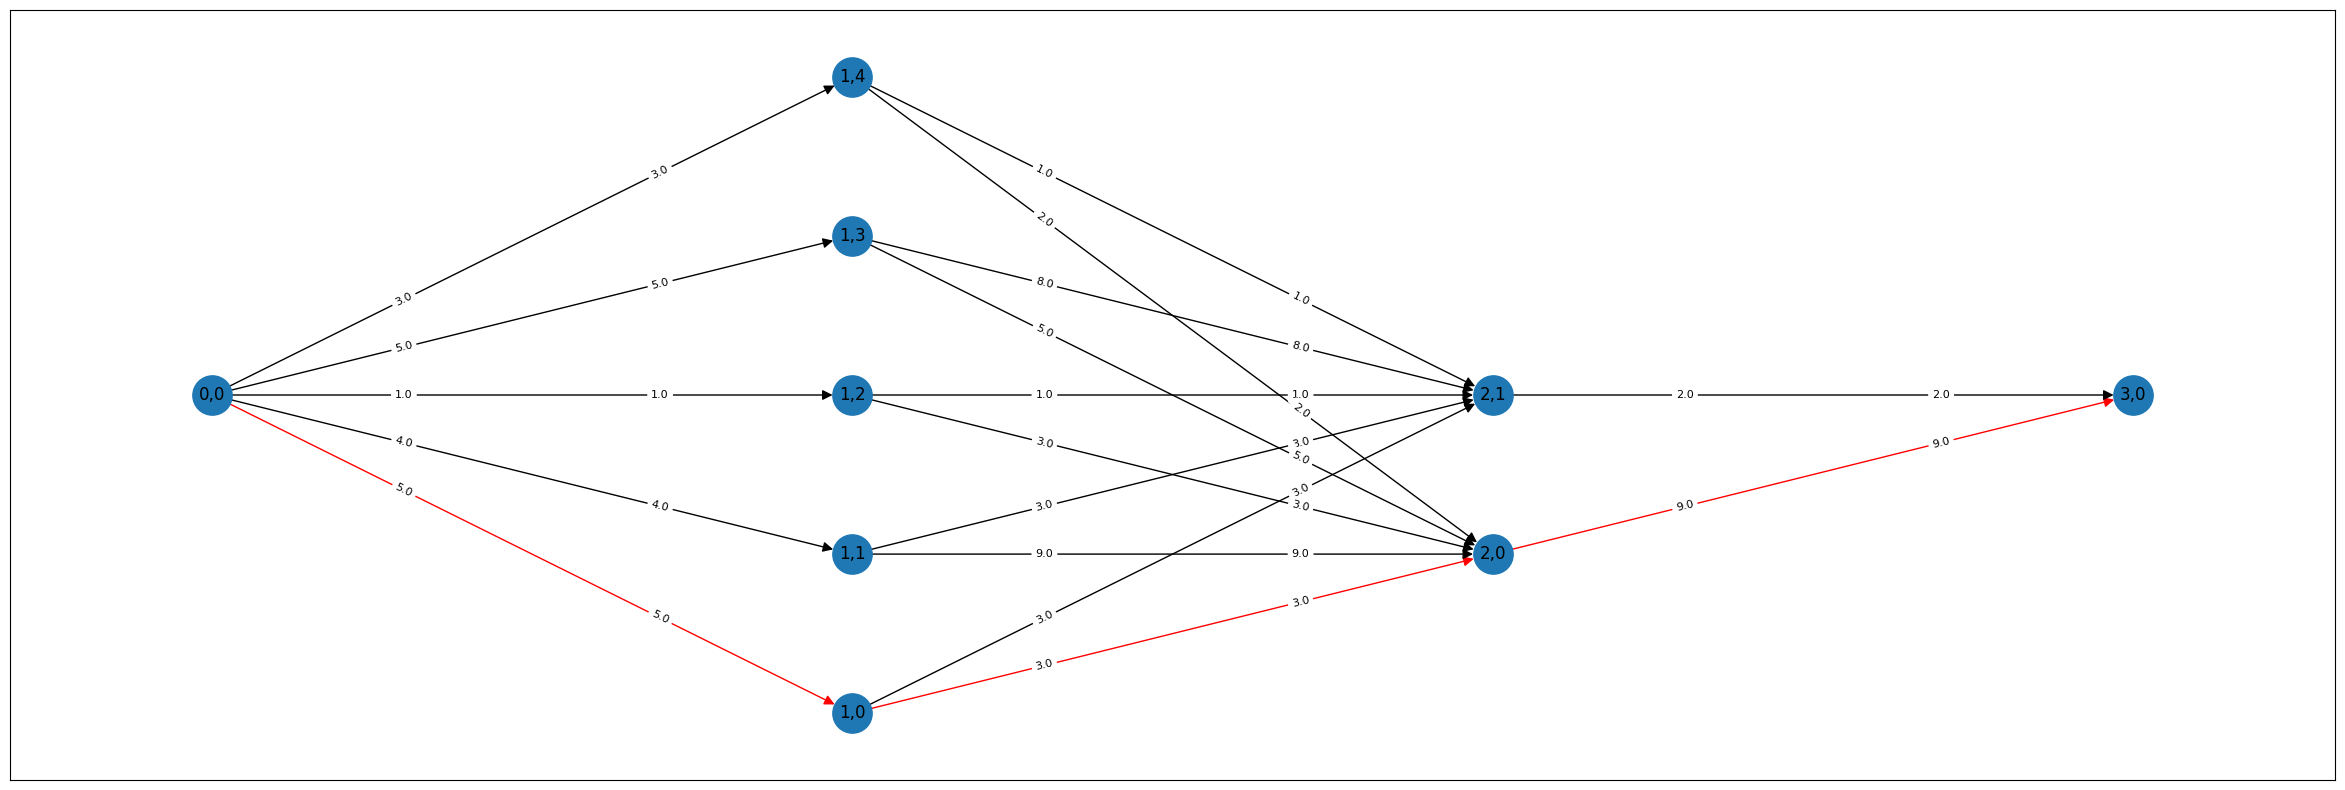

In [13]:
graph = Graph(True, 2, 5)
path, distance = SolveFastestPath()(graph, graph.start, graph.end)
print(f"The best path from {graph.start} to {graph.end} is: {path} with the distance: {distance}")
graph.show(path)

## 3.1 Path Finding Using Divide & Conquer

Now that we have an algorithm to find the shortest path between two nodes, we can make an algorithm that finds the shortest path from node A -> B -> C -> D. To do this you can use the method `split_graph` to split the original graph into three subgraphs, where the first graph contains the nodes from A -> B the second from B -> C and the last from C -> D. Now, implement this down below in the function 
`shortest_path_via_nodes`.

In [14]:
%%execwritefile exercise8_{student}_notebook.py 35 -a -s

def shortest_path_via_nodes(graph, node1=None, node2=None):
    """
    This function has as input a "full" graph and as output the cost
    of going from the start node to the end node through node1 and node2.

    If node1 and/or node2 are none the algorithm chooses a random node to go through.

    :param graph: The graph in which you need to find the path.
    :type graph: Graph
    :param node1: A node that the path must go through.
    :type node1: Node
    :param node2: Another node that the path must go through.
    :type node2: Node
    :return: This returns a path, the cost of a path, and the node that it needs to go through.
             Note, that a path contains the source and destination node.
    :rtype: list[node], float, node1, node2 
    """
    graphs = graph.split_graph(node1, node2)
    paths = [SolveFastestPath()(g, g.start, g.end) for g in graphs]
    total_cost = sum(path[1] for path in paths)
    return [p for path in paths for p in path[0]], total_cost, node1, node2

Appending to exercise8_3893995_notebook.py


## Test your code

In the cell below, you can test your `SolveFastestPath` class.

The best path from Node(0, 0) through None and None to end in Node(9, 0) is: [Node(0, 0), Node(1, 0), Node(2, 0), Node(3, 0), Node(4, 0), Node(5, 0), Node(6, 3), Node(6, 3), Node(7, 0), Node(8, 3), Node(8, 3), Node(9, 0)] with the distance: 42


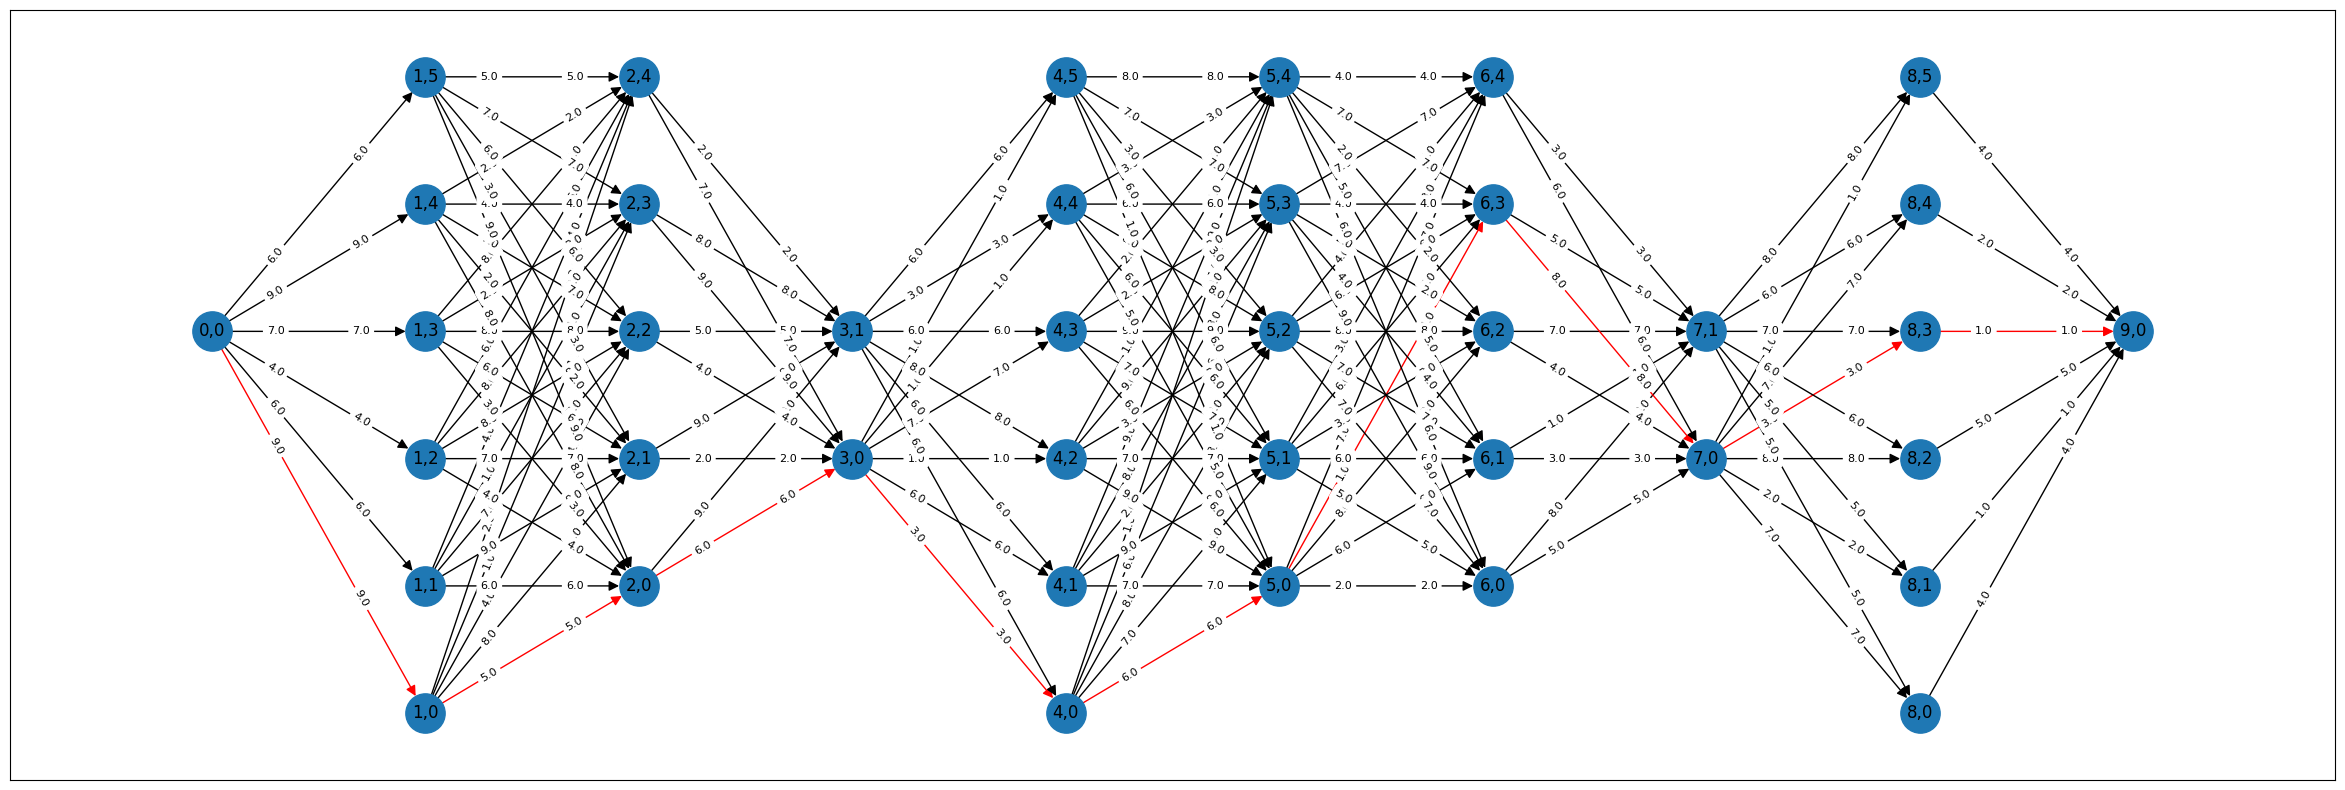

In [15]:
graph = Graph()
path, distance, b, c = shortest_path_via_nodes(graph)
print(f"The best path from {graph.start} through {b} and {c} to end in {graph.end} is: {path} with the distance: {distance}")
graph.show(path)

# 4.0 UNITTESTS

During this assignment, we copied all your code to the following **.py** file **"exercise8_{student}_notebook.py"**. You also tested your code along the way. However, it is possible that there are still a few errors. Therefore, it is good to run some unittest when you complete all coding. This gives you an extra chance to spot mistakes. Here, we added some unittest for you to use. Note, that they are merely a check to see if your **.py** is correct.

From this point onwards we strongly advise renaming the **"exercise8_{student}_notebook.py"** file to the correct file name that you need to hand in **"exercise8_{student}.py"**. Now, you can adjust the **"exercise8_{student}.py"** file without the risk of overwriting it when you run the notebook again. This also enables the possibility to run the unittests. Note, that from now on if you make a change in the Python file and you want to go back to the notebook later that you also make this change in the notebook. To run the unittests go to the **"unit_test.py"** file and run the file in either PyCharm, VSCode, or a terminal. You can run it in a terminal using the following command: `python -m unittest --verbose unit_test.py`. `--verbose` is optional but gives you more details about which tests fail and which succeed.

You are allowed to add your own unittests. 

## Uploading to Brightspace for Bonus

Next, you can upload your Python file with the correct name on brightspace in the bonus assignment. Follow the instructions on this brightspace page carefully to have a successful submission. After you get the feedback for this exercise you can either continue working in the Python file to fix possible bugs or you can go back to the notebook and remake the Python file. ***Please be careful, do not update your code in both the Python file and notebook at the same time!***. If you go back to the notebook do not forget to update the notebook with any changes you made within the Python file. In this case, it is best to just delete the Python file as soon as you copied all changes.

***NOTE, that you can now also upload the exercises from week 1! The process is exactly the same only there is no unittest.***